<a href="https://colab.research.google.com/github/madixson/DogsvsCats_4380Project/blob/main/DogCat_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Google Drive files to Colab Notebook
Access files with path: '/content/drive/MyDrive'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Initial Visualization of Dataset
Plotting dog and cat jpegs to see the data. We note the variation of images and their size differences.

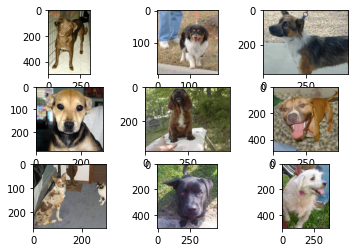

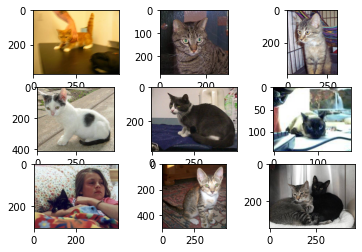

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
from os import path

def plot_jpg(dog_or_cat, folder):
    count = 0
    i = 0
    
    while count != 9:
        animal = dog_or_cat + '.'
        filename = folder + animal + str(i) + '.jpg'
        
        if path.exists(filename):
            pyplot.subplot(330 + 1 + count)
            image = imread(filename)
            pyplot.imshow(image)
            count += 1
        i += 1
        
    return pyplot.show()

folder = '/content/drive/MyDrive/DATA_4380/train/'
plot_jpg('dog',folder)
plot_jpg('cat',folder)

## Pre processing photos into directories

Randomly select 25% of images for use in test dataset and format directories for use of the Keras ImageDataGenerator class

In [ ]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

dataset_home = '/content/drive/MyDrive/DATA_4380/dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
        
seed(1)
val_ratio = 0.25
src_directory = '/content/drive/MyDrive/DATA_4380/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

## Build CNN Model

In [ ]:
# Import necesssary packages
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the data directories
train_dir = '/content/drive/MyDrive/DATA_4380/dataset_dogs_vs_cats/train/'
test_dir = '/content/drive/MyDrive/DATA_4380/dataset_dogs_vs_cats/test/'

# Set the image size and batch size
img_size = (150, 150)
batch_size = 32

# Use the ImageDataGenerator class to rescale the pixel values of the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of training and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=20, validation_data=test_generator, validation_steps=len(test_generator))



Found 18796 images belonging to 2 classes.
Found 6344 images belonging to 2 classes.


Epoch 1/20
588/588 [==============================] - 7347s 12s/step - loss: 0.6287 - accuracy: 0.6410 - val_loss: 0.5454 - val_accuracy: 0.7130
Epoch 2/20
588/588 [==============================] - 630s 1s/step - loss: 0.4907 - accuracy: 0.7650 - val_loss: 0.4571 - val_accuracy: 0.7814
Epoch 3/20
588/588 [==============================] - 630s 1s/step - loss: 0.4150 - accuracy: 0.8130 - val_loss: 0.4032 - val_accuracy: 0.8112
Epoch 4/20
588/588 [==============================] - 634s 1s/step - loss: 0.3419 - accuracy: 0.8507 - val_loss: 0.3999 - val_accuracy: 0.8164
Epoch 5/20
588/588 [==============================] - 631s 1s/step - loss: 0.2555 - accuracy: 0.8922 - val_loss: 0.4599 - val_accuracy: 0.8172
Epoch 6/20
588/588 [==============================] - 631s 1s/step - loss: 0.1534 - accuracy: 0.9386 - val_loss: 0.4980 - val_accuracy: 0.8225
Epoch 7/20
588/588 [==============================] - 632s 1s/step - loss: 0.0834 - accuracy: 0.9700 - val_loss: 0.7437 - val_accuracy: 0.82

## Analyze and Visualize Training Results

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

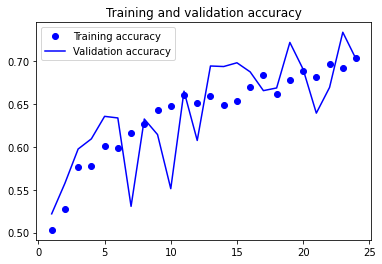

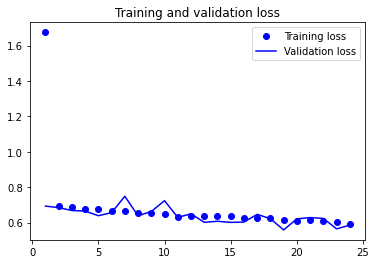

In [ ]:
# Plot Results from CNN Model using visualization function
plot_training_history(history)

## Using VGG16 Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Set up data generators for training and validation
train_dir = '/content/drive/MyDrive/DATA_4380/dataset_dogs_vs_cats/train/'
test_dir = '/content/drive/MyDrive/DATA_4380/dataset_dogs_vs_cats/test/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

# Load pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new top layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine base model with new top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in base model
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size,
          epochs=10, validation_data=test_generator, validation_steps=test_generator.n//test_generator.batch_size)


Found 18796 images belonging to 2 classes.
Found 6344 images belonging to 2 classes.
Epoch 1/10
587/587 [==============================] - 7852s 13s/step - loss: 0.3299 - accuracy: 0.8593 - val_loss: 0.2007 - val_accuracy: 0.9193
Epoch 2/10
587/587 [==============================] - 7731s 13s/step - loss: 0.2427 - accuracy: 0.8953 - val_loss: 0.1716 - val_accuracy: 0.9323
Epoch 3/10
587/587 [==============================] - 7666s 13s/step - loss: 0.2428 - accuracy: 0.8945 - val_loss: 0.1576 - val_accuracy: 0.9380
Epoch 4/10
587/587 [==============================] - 7536s 13s/step - loss: 0.2272 - accuracy: 0.9027 - val_loss: 0.1778 - val_accuracy: 0.9242
Epoch 5/10
587/587 [==============================] - 7485s 13s/step - loss: 0.2216 - accuracy: 0.9043 - val_loss: 0.1587 - val_accuracy: 0.9358
Epoch 6/10
587/587 [==============================] - 7489s 13s/step - loss: 0.2129 - accuracy: 0.9092 - val_loss: 0.1475 - val_accuracy: 0.9416
Epoch 7/10
587/587 [=========================